<a href="https://colab.research.google.com/github/akansha55/PRISM/blob/master/CO_Doc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.manifold import SpectralEmbedding
from mpl_toolkits.mplot3d import Axes3D


import os
data = pd.read_csv("/ethylene_CO.csv")
data.describe()

print(data.head(20))

print(data.info())

    Time (seconds)  CO conc(ppm)  ...  TGS2620.2  TGS2620.3
0             0.00           0.0  ...    7650.61    6928.42
1             0.01           0.0  ...    7498.79    6800.66
2             0.01           0.0  ...    7369.67    6697.47
3             0.03           0.0  ...    7285.13    6578.52
4             0.04           0.0  ...    7156.74    6468.32
5             0.05           0.0  ...    7067.61    6385.31
6             0.06           0.0  ...    6976.13    6300.97
7             0.07           0.0  ...    6900.01    6248.81
8             0.07           0.0  ...    6827.34    6183.33
9             0.09           0.0  ...    6789.64    6101.90
10            0.10           0.0  ...    6674.81    6020.02
11            0.10           0.0  ...    6611.69    5980.02
12            0.12           0.0  ...    6545.93    5898.56
13            0.12           0.0  ...    6495.29    5864.49
14            0.14           0.0  ...    6417.71    5815.49
15            0.14           0.0  ...   

(array([74383., 10000.]),
 array([  0.   , 266.665, 533.33 ]),
 <a list of 2 Patch objects>)

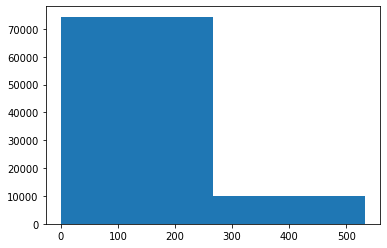

In [44]:
plt.hist(data["CO conc(ppm)"], bins=2)
#plt.show()

In [45]:

#importing the necessary libraries and dependencies
import pandas as pd
import numpy as np
import seaborn as sns;
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

csv_file = pd.read_csv("/ethylene_CO.csv")
csv_file.drop(columns= ['Ethylene conc(ppm)','TGS2600','TGS2602','TGS2610','TGS2620'],inplace=True)
print(csv_file.columns)


#number of rows and columns in the dataset
csv_file.shape

#statistical information about columns
csv_file.describe
#checking how many null values are in each column
csv_file.isnull().sum()
# dropping all the rows with NaN values
csv_file = csv_file.dropna()


Index(['Time (seconds)', 'CO conc(ppm)', 'TGS2602.1', 'TGS2600.1', ' TGS2610',
       ' TGS2610.1', 'TGS2620.1', 'TGS2602.2', 'TGS2602.3', 'TGS2600.2',
       'TGS2600.3', 'TGS2610.1', 'TGS2620.2', 'TGS2620.3'],
      dtype='object')


In [46]:
#viewing few rows from the top
csv_file.head()

,Time (seconds),CO conc(ppm),TGS2602.1,TGS2600.1,TGS2610,TGS2610.1,TGS2620.1,TGS2602.2,TGS2602.3,TGS2600.2,TGS2600.3,TGS2610.1,TGS2620.2,TGS2620.3
0,0.00,0.0,-1.95,1.30,-4.07,-28.73,-3.25,55139.95,50669.50,9626.26,9762.62,21420.68,7650.61,6928.42
1,0.01,0.0,-5.53,0.49,3.58,-34.55,5.37,54395.77,50046.91,9433.20,9591.21,20930.33,7498.79,6800.66
2,0.01,0.0,-16.09,0.00,-7.16,-42.14,-5.86,53960.02,49299.30,9324.40,9449.81,20504.94,7369.67,6697.47
3,0.03,0.0,-10.57,4.40,-11.22,-37.94,-1.14,53047.71,48907.00,9170.64,9305.58,20101.42,7285.13,6578.52
4,0.04,0.0,-20.79,6.03,3.42,-34.22,8.31,52700.28,48330.96,9073.64,9163.47,19694.07,7156.74,6468.32


In [97]:

#defining training and testing data
x_train = csv_file[:24865]
y_train = x_train['TGS2620.1']
x_test = csv_file[24865:31898]
y_test = x_test['TGS2620.1']
print(y_test)

24865    7190.34
24866    7179.77
24867    7163.45
24868    7169.68
24869    7178.33
          ...   
31893    7753.63
31894    7747.48
31895    7747.48
31896    7726.49
31897    7752.09
Name: TGS2620.1, Length: 7033, dtype: float64


In [95]:
csv_file.loc[24865:31898].count() / csv_file.shape[0] * 100

Time (seconds)    8.335901
CO conc(ppm)      8.335901
TGS2602.1         8.335901
TGS2600.1         8.335901
 TGS2610          8.335901
 TGS2610.1        8.335901
TGS2620.1         8.335901
TGS2602.2         8.335901
TGS2602.3         8.335901
TGS2600.2         8.335901
TGS2600.3         8.335901
TGS2610.1         8.335901
TGS2620.2         8.335901
TGS2620.3         8.335901
dtype: float64

In [98]:
#Normalizing training data
train_norm = x_train['TGS2620.1']

#converted into array as all the methods available are for arrays and not lists
train_norm_arr = np.asarray(train_norm)
train_norm = np.reshape(train_norm_arr, (-1, 1))

#Scaling all values between 0 and 1 so that large values don't just dominate
scaler = MinMaxScaler(feature_range=(0, 1))
train_norm = scaler.fit_transform(train_norm)
for i in range(5):
    print(train_norm[i])

[0.00146731]
[0.00266392]
[0.00110499]
[0.00176021]
[0.00307204]


In [50]:
count = 0
for i in range(len(train_norm)):
    if train_norm[i] == 0:
        count = count +1
print('Number of null values in train_norm = ', count)

Number of null values in train_norm =  1


In [51]:
#removing null values 
train_norm = train_norm[train_norm!=0]

In [52]:
#Normalizing testing data and repeating the same process as done for training data
test_norm = x_test['TGS2620.1']
test_norm_arr = np.asarray(test_norm)
test_norm = np.reshape(test_norm_arr, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
test_norm = scaler.fit_transform(test_norm)
for i in range(5):
    print(test_norm[i])

[0.02053942]
[0.01246572]
[0.]
[0.00475867]
[0.01136581]


In [53]:
count = 0
for i in range(len(test_norm)):
    if test_norm[i] == 0:
        count = count + 1 
print('Number of null values in test_norm = ', count)

Number of null values in test_norm =  1


In [54]:
#removing null values
test_norm = test_norm[test_norm != 0]

In [55]:
print(train_norm.shape)
print(test_norm.shape)

(24864,)
(7032,)


In [56]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X),array(y)

In [57]:
n_steps = 3
X_split_train, y_split_train = split_sequence(train_norm, n_steps)
#for i in range(len(X_split_train)):
    #print(X_split_train[i], y_split_train[i])
n_features = 1
X_split_train = X_split_train.reshape((X_split_train.shape[0], X_split_train.shape[1], n_features))
for i in range(5):
    print(X_split_train)

[[[0.00146731]
  [0.00266392]
  [0.00110499]]

 [[0.00266392]
  [0.00110499]
  [0.00176021]]

 [[0.00110499]
  [0.00176021]
  [0.00307204]]

 ...

 [[0.9983328 ]
  [0.99759845]
  [0.99773171]]

 [[0.99759845]
  [0.99773171]
  [0.99640045]]

 [[0.99773171]
  [0.99640045]
  [0.99786498]]]
[[[0.00146731]
  [0.00266392]
  [0.00110499]]

 [[0.00266392]
  [0.00110499]
  [0.00176021]]

 [[0.00110499]
  [0.00176021]
  [0.00307204]]

 ...

 [[0.9983328 ]
  [0.99759845]
  [0.99773171]]

 [[0.99759845]
  [0.99773171]
  [0.99640045]]

 [[0.99773171]
  [0.99640045]
  [0.99786498]]]
[[[0.00146731]
  [0.00266392]
  [0.00110499]]

 [[0.00266392]
  [0.00110499]
  [0.00176021]]

 [[0.00110499]
  [0.00176021]
  [0.00307204]]

 ...

 [[0.9983328 ]
  [0.99759845]
  [0.99773171]]

 [[0.99759845]
  [0.99773171]
  [0.99640045]]

 [[0.99773171]
  [0.99640045]
  [0.99786498]]]
[[[0.00146731]
  [0.00266392]
  [0.00110499]]

 [[0.00266392]
  [0.00110499]
  [0.00176021]]

 [[0.00110499]
  [0.00176021]
  [0.0030720

In [58]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))

#sgd = optimizers.SGD(lr=0.001, decay=1e-5, momentum=1.0, nesterov=False)
sgd = optimizers.SGD(lr=0.01, decay=1e-5, momentum=0.9, nesterov=True) #good

#keras.optimizers.RMSprop(learning_rate=0.01, rho=0.9)
keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [59]:
hist = model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=10, verbose = 1)

Epoch 1/10
777/777 [==============================] - 3s 3ms/step - loss: 0.0060 - accuracy: 4.0224e-05 - val_loss: 1.6438e-04 - val_accuracy: 1.4225e-04
Epoch 2/10
777/777 [==============================] - 2s 3ms/step - loss: 2.9026e-06 - accuracy: 4.0224e-05 - val_loss: 1.6370e-04 - val_accuracy: 1.4225e-04
Epoch 3/10
777/777 [==============================] - 3s 3ms/step - loss: 2.9085e-06 - accuracy: 4.0224e-05 - val_loss: 1.6366e-04 - val_accuracy: 1.4225e-04
Epoch 4/10
777/777 [==============================] - 3s 3ms/step - loss: 2.9205e-06 - accuracy: 4.0224e-05 - val_loss: 1.6263e-04 - val_accuracy: 1.4225e-04
Epoch 5/10
777/777 [==============================] - 2s 3ms/step - loss: 3.1399e-06 - accuracy: 4.0224e-05 - val_loss: 1.6478e-04 - val_accuracy: 1.4225e-04
Epoch 6/10
777/777 [==============================] - 3s 3ms/step - loss: 3.1004e-06 - accuracy: 4.0224e-05 - val_loss: 1.6355e-04 - val_accuracy: 1.4225e-04
Epoch 7/10
777/777 [==============================] - 3s

In [60]:
X_split_test, y_split_test = split_sequence(test_norm, n_steps)
for i in range(5):
    print(X_split_test[i], y_split_test[i])
n_features = 1
X_split_test = X_split_test.reshape((X_split_test.shape[0], X_split_test.shape[1], n_features))

[0.02053942 0.01246572 0.00475867] 0.011365806338270446
[0.01246572 0.00475867 0.01136581] 0.02421344495451372
[0.00475867 0.01136581 0.02421344] 0.012465723080683944
[0.01136581 0.02421344 0.01246572] 0.020906056416563068
[0.02421344 0.01246572 0.02090606] 0.011732445252408574


In [62]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))

#sgd = optimizers.SGD(lr=0.001, decay=1e-5, momentum=1.0, nesterov=False)
sgd = optimizers.SGD(lr=0.01, decay=1e-5, momentum=0.9, nesterov=True) #good

#keras.optimizers.RMSprop(learning_rate=0.01, rho=0.9)
keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [63]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [101]:
yhat = model.predict(X_split_test)
for i in range(5):
    print(yhat[i])

[0.01405194]
[0.00993706]
[0.01232367]
[0.01623696]
[0.01968447]


In [102]:
mse = mean_squared_error(y_split_test, yhat)
print('MSE: %.5f' % mse)

MSE: 0.00017


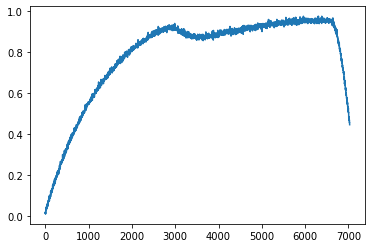

In [103]:
plt.plot(yhat)

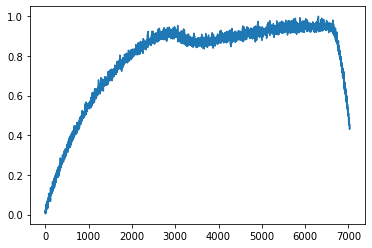

In [104]:
plt.plot(y_split_test)

In [106]:
_, train_acc = model.evaluate(X_split_train, y_split_train, verbose=0)
_, test_acc = model.evaluate(X_split_test, y_split_test, verbose=0)
print('Train: %.5f, Test: %.5f' % (train_acc, test_acc))

Train: 0.00004, Test: 0.00014


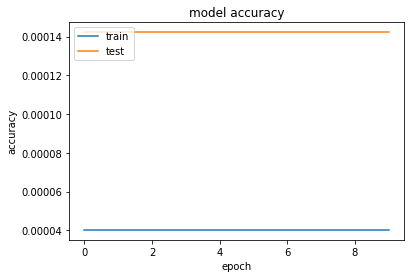

In [125]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

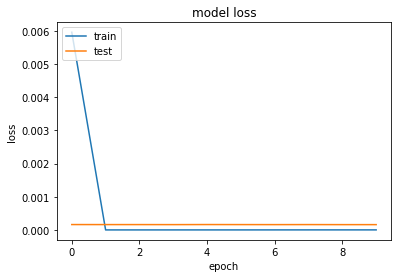

In [111]:

# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [112]:
def compute(var):
    train_norm = x_train[var] 
    train_norm_arr = np.asarray(train_norm)
    train_norm = np.reshape(train_norm_arr, (-1, 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_norm = scaler.fit_transform(train_norm)
    train_norm = train_norm[train_norm != 0]
    
    test_norm = x_test[var]
    test_norm_arr = np.asarray(test_norm)
    test_norm = np.reshape(test_norm_arr, (-1, 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    test_norm = scaler.fit_transform(test_norm)
    test_norm = test_norm[test_norm != 0]

    X_split_train, y_split_train = split_sequence(train_norm, n_steps)
    X_split_train = X_split_train.reshape((X_split_train.shape[0], X_split_train.shape[1], n_features))

    X_split_test, y_split_test = split_sequence(test_norm, n_steps)
    X_split_test = X_split_test.reshape((X_split_test.shape[0], X_split_test.shape[1], n_features))

    hist = model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=10, verbose = 1)

    yhat = model.predict(X_split_test)

    mse = mean_squared_error(y_split_test, yhat)
    print(mse)
    
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Epoch 1/10
777/777 [==============================] - 2s 3ms/step - loss: 3.6860e-06 - accuracy: 4.0224e-05 - val_loss: 1.6313e-04 - val_accuracy: 1.4227e-04
Epoch 2/10
777/777 [==============================] - 2s 3ms/step - loss: 3.9536e-06 - accuracy: 4.0224e-05 - val_loss: 1.6660e-04 - val_accuracy: 1.4227e-04
Epoch 3/10
777/777 [==============================] - 2s 3ms/step - loss: 3.8663e-06 - accuracy: 4.0224e-05 - val_loss: 1.6977e-04 - val_accuracy: 1.4227e-04
Epoch 4/10
777/777 [==============================] - 2s 3ms/step - loss: 3.4750e-06 - accuracy: 4.0224e-05 - val_loss: 1.6276e-04 - val_accuracy: 1.4227e-04
Epoch 5/10
777/777 [==============================] - 2s 3ms/step - loss: 3.6892e-06 - accuracy: 4.0224e-05 - val_loss: 1.7935e-04 - val_accuracy: 1.4227e-04
Epoch 6/10
777/777 [==============================] - 2s 3ms/step - loss: 3.7506e-06 - accuracy: 4.0224e-05 - val_loss: 1.6254e-04 - val_accuracy: 1.4227e-04
Epoch 7/10
777/777 [==============================] 

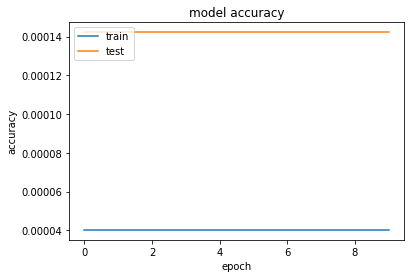

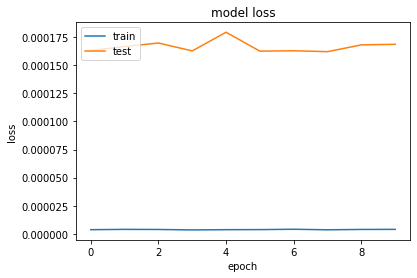

In [124]:
compute('TGS2620.1')

Epoch 1/10
777/777 [==============================] - 2s 3ms/step - loss: 4.9205e-06 - accuracy: 4.0224e-05 - val_loss: 7.4422e-05 - val_accuracy: 1.4227e-04
Epoch 2/10
777/777 [==============================] - 2s 3ms/step - loss: 4.5130e-06 - accuracy: 4.0224e-05 - val_loss: 8.4473e-05 - val_accuracy: 1.4227e-04
Epoch 3/10
777/777 [==============================] - 2s 3ms/step - loss: 4.6264e-06 - accuracy: 4.0224e-05 - val_loss: 7.0353e-05 - val_accuracy: 1.4227e-04
Epoch 4/10
777/777 [==============================] - 2s 3ms/step - loss: 4.5368e-06 - accuracy: 4.0224e-05 - val_loss: 7.0390e-05 - val_accuracy: 1.4227e-04
Epoch 5/10
777/777 [==============================] - 2s 3ms/step - loss: 4.6298e-06 - accuracy: 4.0224e-05 - val_loss: 7.0126e-05 - val_accuracy: 1.4227e-04
Epoch 6/10
777/777 [==============================] - 2s 3ms/step - loss: 5.1825e-06 - accuracy: 4.0224e-05 - val_loss: 7.0693e-05 - val_accuracy: 1.4227e-04
Epoch 7/10
777/777 [==============================] 

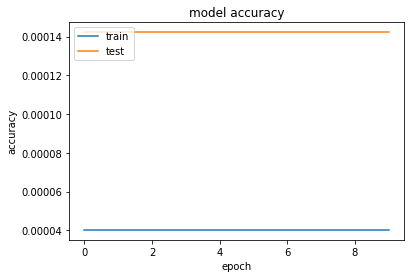

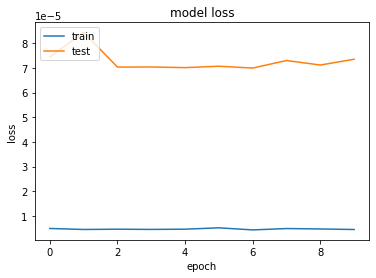

In [119]:
compute('TGS2600.1')

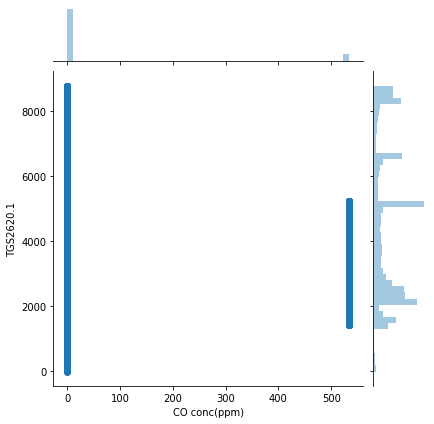

In [133]:
sns.jointplot(x=csv_file['CO conc(ppm)'], y=csv_file['TGS2620.1'], data = csv_file)

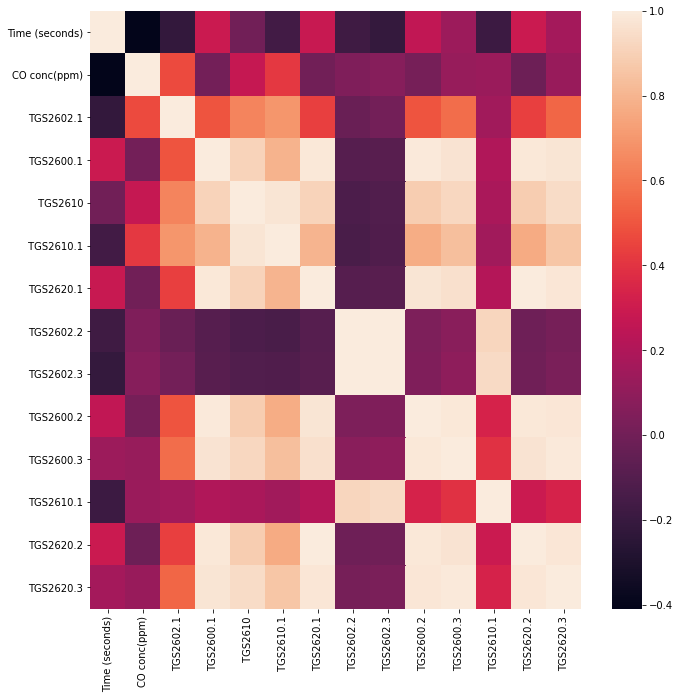

In [122]:
corrmat = csv_file.corr()
fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(corrmat)

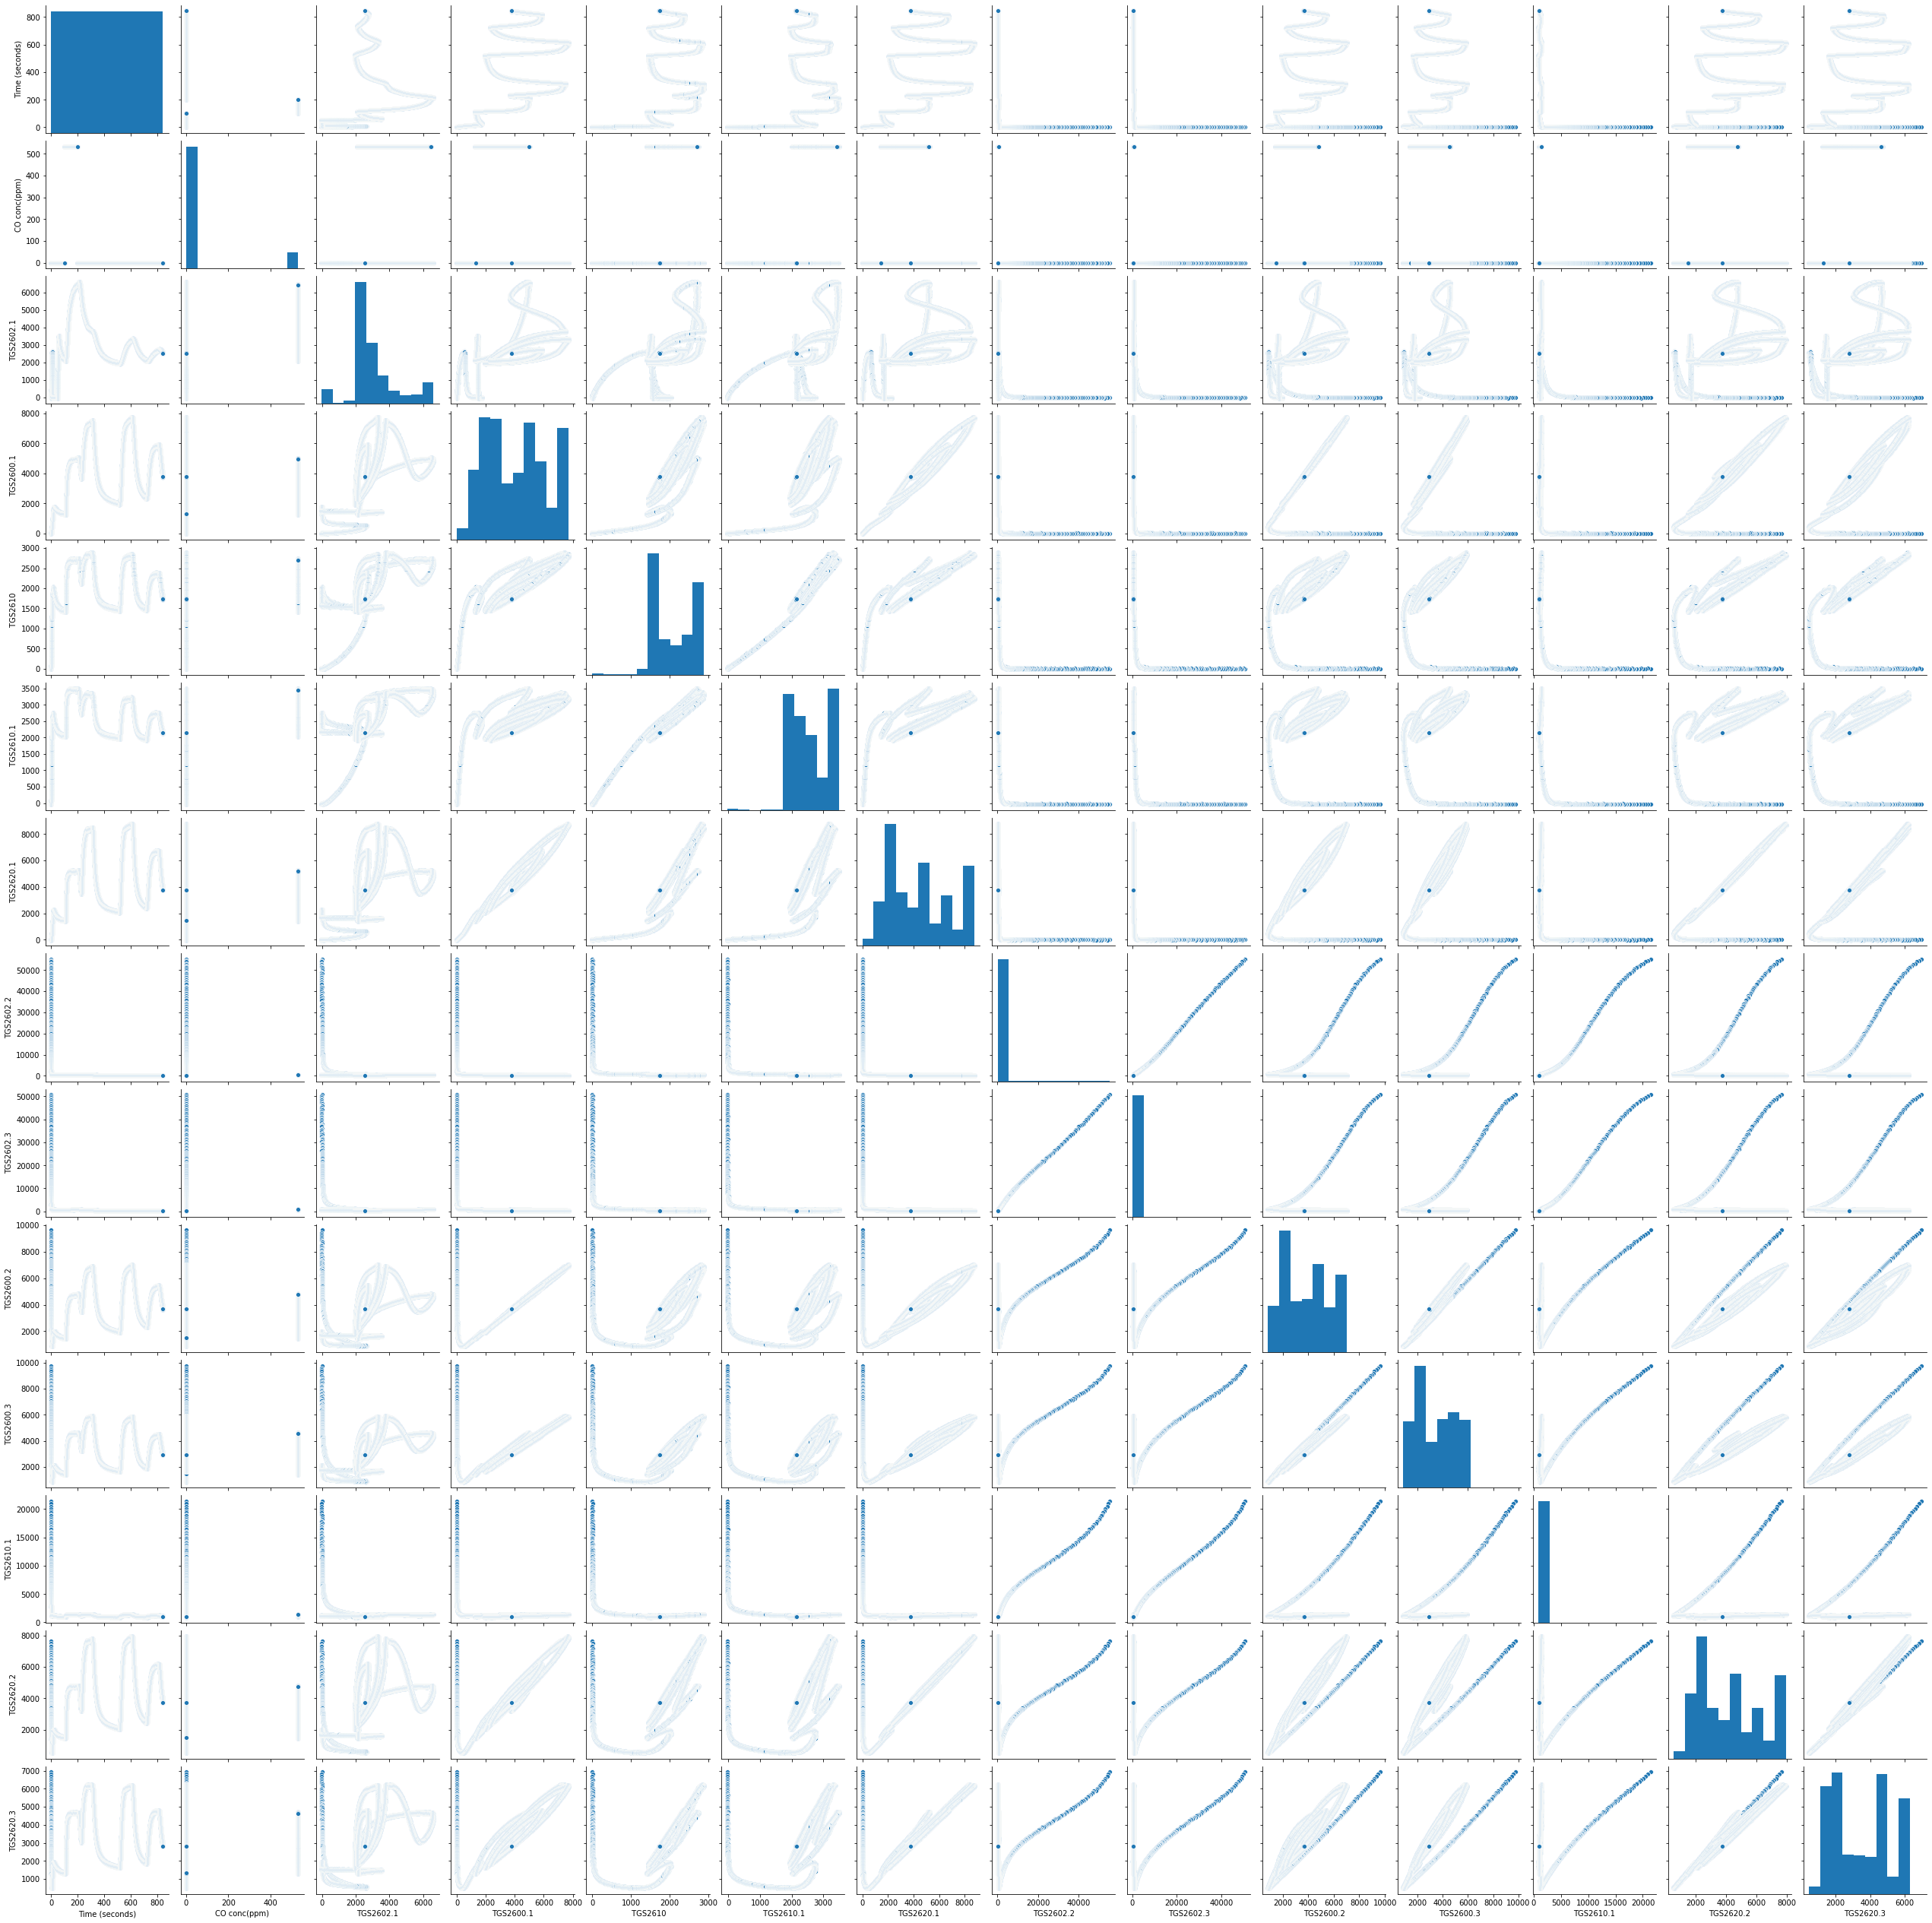

In [75]:
g = sns.pairplot(csv_file)

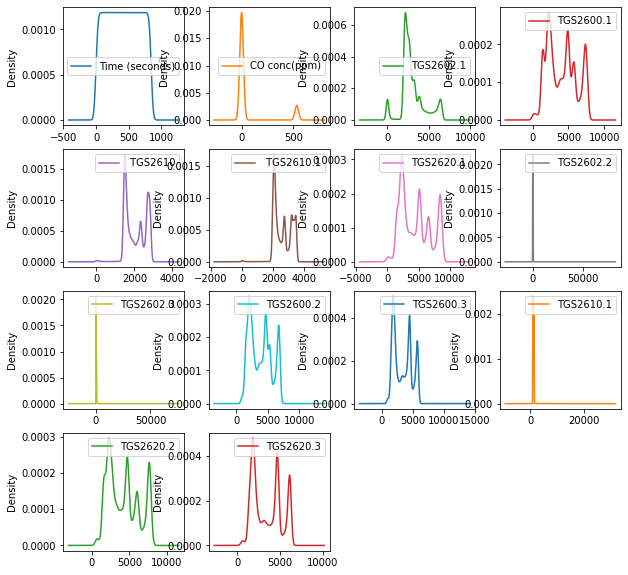

In [76]:

csv_file.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(10,10))
plt.show()

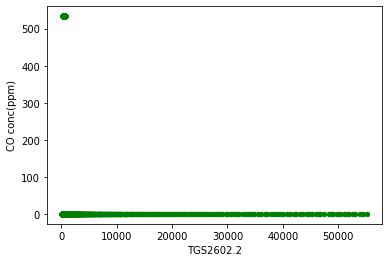

In [137]:
 csv_file.plot.scatter(x='TGS2602.2', y='CO conc(ppm)', c='green')
# csv_file

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


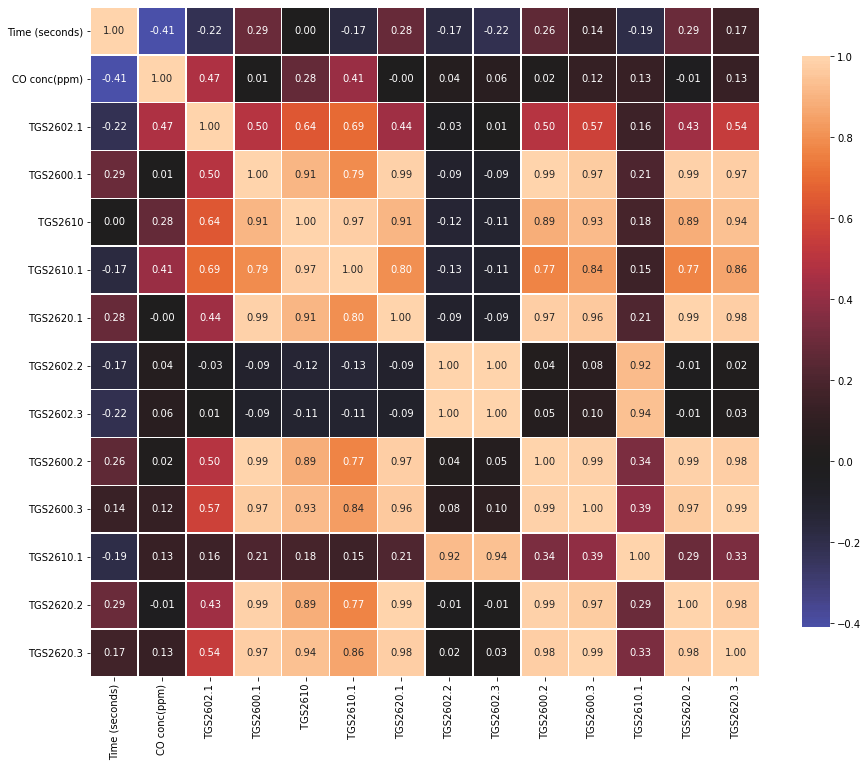

In [79]:
correlations = csv_file.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();

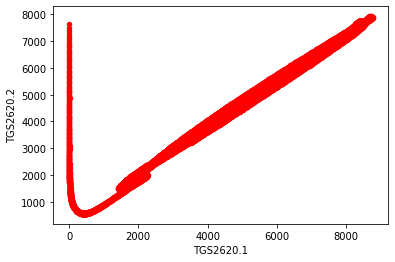

In [80]:
csv_file.plot.scatter(x='TGS2620.1', y='TGS2620.2', c='red')